In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import preprocessing

import random

In [2]:
df = pd.read_csv("data\\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


## Scaling the Dataset, for better performance

In [3]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop("price", axis="columns"))  # Bring the included columns in 0-1 scale
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))  # Bring the included columns in 0-1 scale
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

## 1) Gradient Descent

In [5]:
scaled_x.shape

(20, 2)

In [6]:
scaled_x.T.shape # .T converts rows into columns and vice versa

(2, 20)

In [7]:
np.ones(shape=(2))

array([1., 1.])

In [8]:
w1 = np.ones(shape=(2))
w1

array([1., 1.])

In [9]:
# Computing only our first entry
scaled_x[0][0] * w1[0] + scaled_x[0][1] * w1[1] + 0  # Last zero: bias

0.3382758620689655

In [10]:
np.dot(w1, scaled_x.T)  # This executes the above computation for all our data.

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [11]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]  # 3 features: area, bedroom and age
    w = np.ones(shape=(number_of_features))  # Initializing the weights as ones, with the same shape as number_of_features
    b = 0  # Initilize bias as 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):  # In each iteration, we will use all training samples to do training
        y_pred = np.dot(w, x.T) + b  # w1 * area + w2 * bedrooms + bias
        
        # Partial Derivatives, finding the gradients.
        w_grad = -(2/total_samples) * (x.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples) * np.sum(y_true-y_pred)
        
        # Adjusting weight and bias  (w/b - LearningRate * Derivative)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # Mean Square Error (MSE)
        square_error = np.square(y_true - y_pred)
        cost = np.mean(square_error)
        
        # We want to build a graph, so we'll record the values of epoch and cost at every 10th iteration
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 500)

In [12]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

In [13]:
cost

0.0068641890429808105

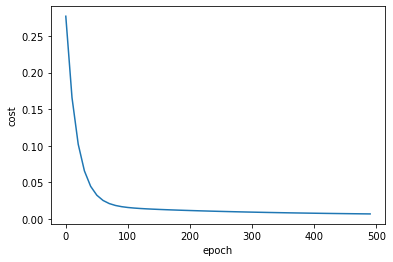

In [14]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [15]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]  # Scale the values to the 0-1 range
    
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    
    # Reverse transform to get the actual price instead of 0-1 range.
    return sy.inverse_transform([[scaled_price]])[0][0]  # Returning a single value instead of a 2D Array

predict(2600, 4, w, b) 

128.45484403267596

## 2) Stochastic Gradient Descent

In [16]:
random.randint(0, 20)

0

In [17]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]  # 3 features: area, bedroom and age
    w = np.ones(shape=(number_of_features))  # Initializing the weights as ones, with the same shape as number_of_features
    b = 0  # Initilize bias as 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs): 
        random_index = random.randint(0, total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w, sample_x.T) + b
        
        # Partial Derivatives, finding the gradients.
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_pred))
        b_grad = -(2/total_samples) * (sample_y - y_pred)
        
        # Adjusting weight and bias  (w/b - LearningRate * Derivative)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # Mean Square Error (MSE)
        square_error = np.square(sample_y - y_pred)
        cost = np.mean(square_error)
        
        # We want to build a graph, so we'll record the values of epoch and cost at every 100th iteration
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, 
                                                                          scaled_y.reshape(scaled_y.shape[0], ), 10000)

In [18]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [19]:
w_sgd, b_sgd, cost_sgd

(array([0.70439404, 0.67239545]), -0.23020484016861112, 0.00027880558854904145)

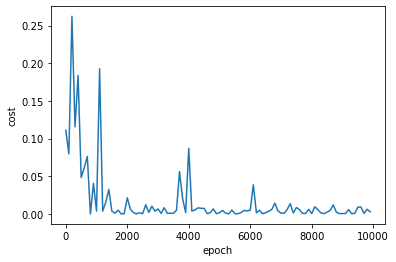

In [20]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [21]:
predict(2600, 4, w, b) 

128.45484403267596

In [22]:
predict(2600, 4, w_sgd, b_sgd) 

128.0257478972397